In [74]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [75]:
pima = pd.read_csv("../data/diabetes.csv")

feature_cols = ['Pregnancies','Insulin', 'BMI', 'Age']

In [76]:
X = pima[feature_cols]
y = pima['Outcome']

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

/Users/natepill/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
y_pred = logreg.predict(X_test) # THIS DATA HAS NEVER SEEN ANY TRAINING DATA, BUT THE MODEL HAS BEEN TRAINED USING TRAINING DATA
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


In [53]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 47,  15]])

In [54]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.6927083333333334
0.5555555555555556
0.24193548387096775
0.3370786516853933


# When we want to compare two classifers we compare their Accuaracy and F1 scores

In [78]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)

/Users/natepill/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [80]:
y_pred_prob

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438],
       [0.64244443, 0.35755557],
       [0.25912035, 0.74087965],
       [0.63949765, 0.36050235],
       [0.76987637, 0.23012363],
       [0.57345769, 0.42654231],
       [0.80896485, 0.19103515],
       [0.54236399, 0.45763601],
       [0.8809859 , 0.1190141 ],
       [0.56071047, 0.43928953],
       [0.63038849, 0.36961151],
       [0.55812011, 0.44187989],
       [0.62388338, 0.37611662],
       [0.80183978, 0.19816022],
       [0.58322696, 0.41677304],
       [0.84451719, 0.15548281],
       [0.7468329 , 0.2531671 ],
       [0.90256923, 0.09743077],
       [0.30366288, 0.69633712],
       [0.84641691, 0.15358309],
       [0.7802164 , 0.2197836 ],
       [0.

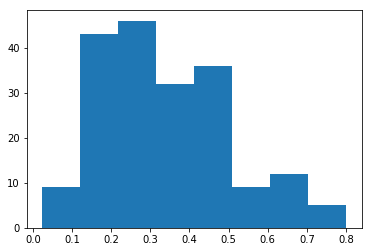

In [64]:
plt.hist(y_pred_prob[:, 1], bins=8)
plt.show()

In [65]:
threshold = y_train.value_counts()[1] / len(y_train) # why is this the threshold?
threshold

0.3576388888888889

In [82]:
num_of_0 = 0
num_of_1 = 0

for arr in y_pred_prob:
    if arr[1] >= threshold:
        num_of_0 += 1
    else:
        num_of_1 += 1
        
print(len(y_pred))
print(num_of_0)
print(num_of_1)

192
81
111


## With reevaluation of confusion matrix with the optimal threshold edit, we get a slightly worse accuracy, but a MUCH HIGHER F1 score, making the mode with the optimal threshold the better model